In [1]:
import anndata
import scanpy as sc
import scanpy
import numpy as np
import os

BATCH_LABELS = ("control", "treated")

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


## Load data set

In [2]:
batches = {}

for batch in BATCH_LABELS:
    filename = "tgfb1-4-" + batch + ".h5ad"
    filename = os.path.join("write", filename)
    batches[batch] = anndata.read(filename)

batches

{'control': AnnData object with n_obs × n_vars = 5347 × 4542 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature', 'fibroblast signature', 'ALK5 signature', 'ALK1 signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'spliced', 'unspliced',
 'treated': AnnData object with n_obs × n_vars = 7441 × 4542 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature', 'fibroblast signature', 'ALK5 signature', 'ALK1 signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca

## Re-compute UMAP plots

We will re-create the previously generated UMAP plots colored by UMAP clusters and some interesting genes.

creating UMAP for batch control


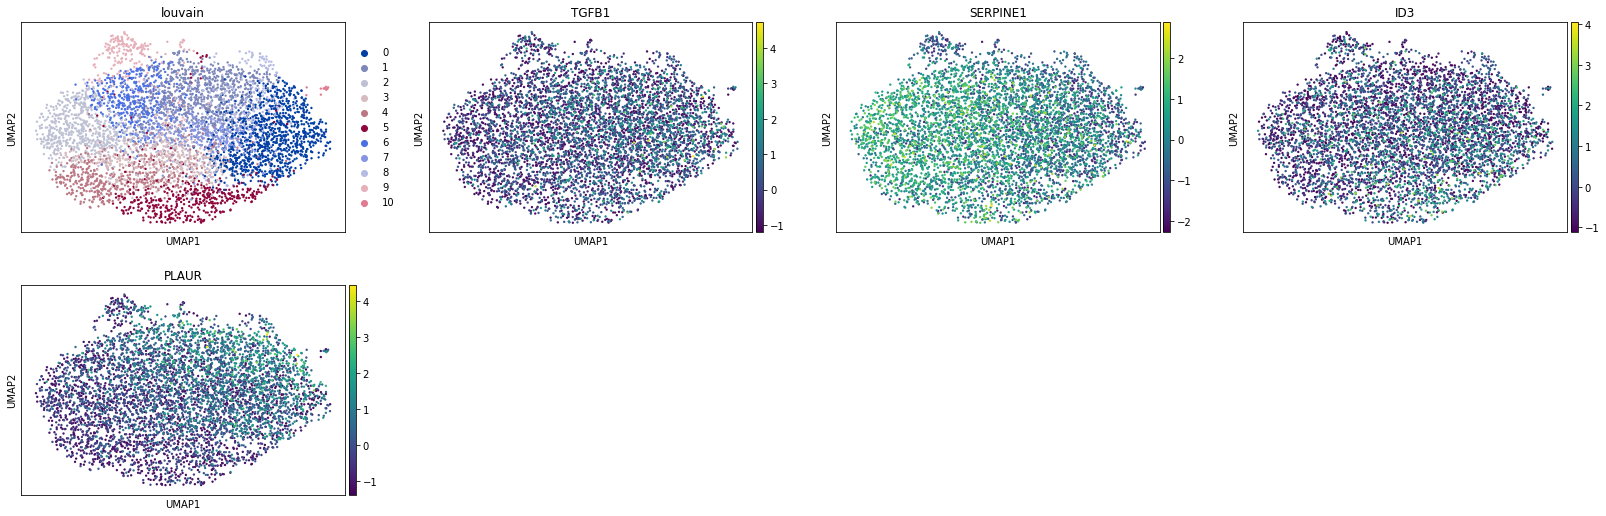

creating UMAP for batch treated


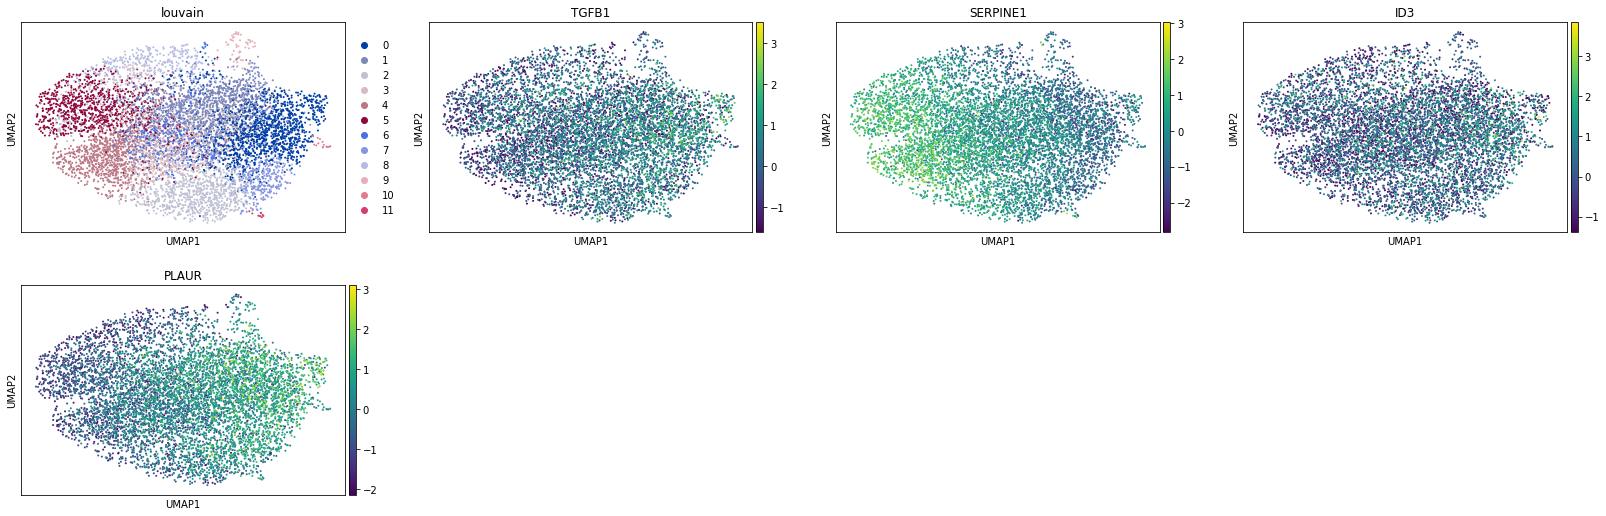

In [3]:
for batch, matrix in batches.items():
    print("creating UMAP for batch", batch)

    sc.pl.umap(matrix, color=['louvain', 'TGFB1', 'SERPINE1', 'ID3', 'PLAUR'])

## Finding marker genes per cluster

Let us compute a ranking for the highly differential genes in each cluster. For this, by default, the .raw attribute of AnnData is used in case it has been initialized before. We will use the Mann–Whitney–Wilcoxon test to compute this data.

marker genes per cluster for batch control


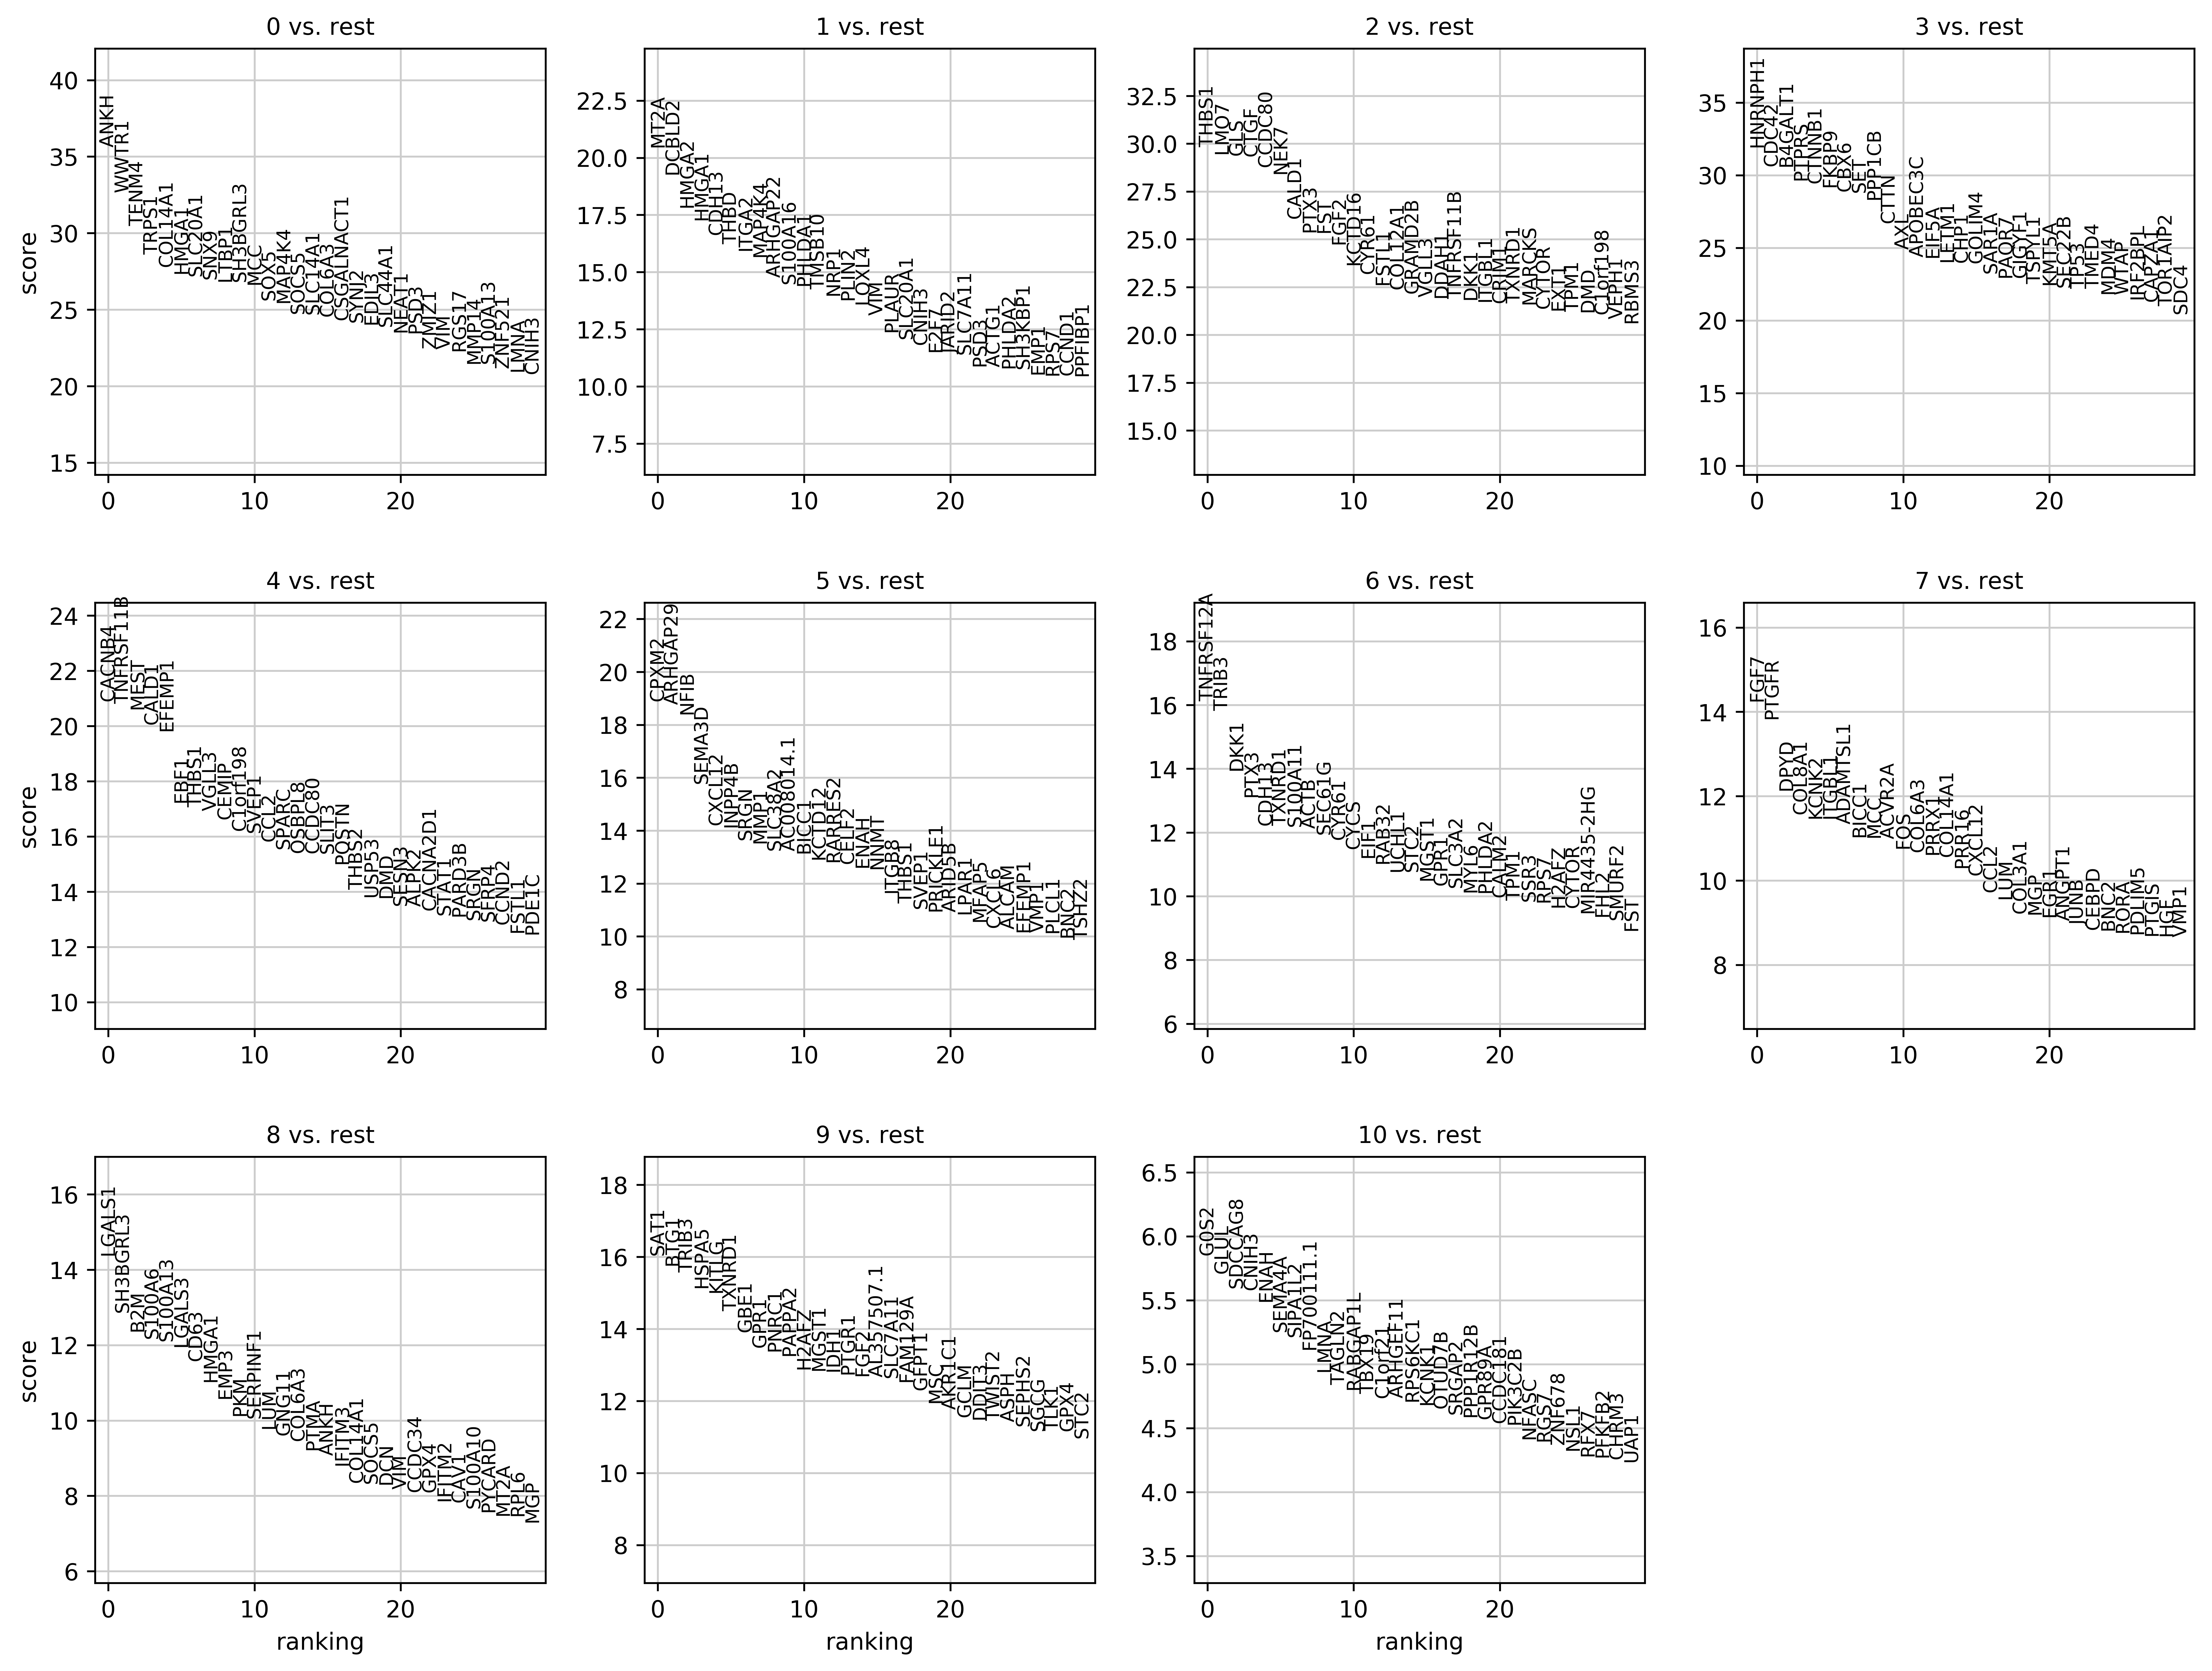

marker genes per cluster for batch treated


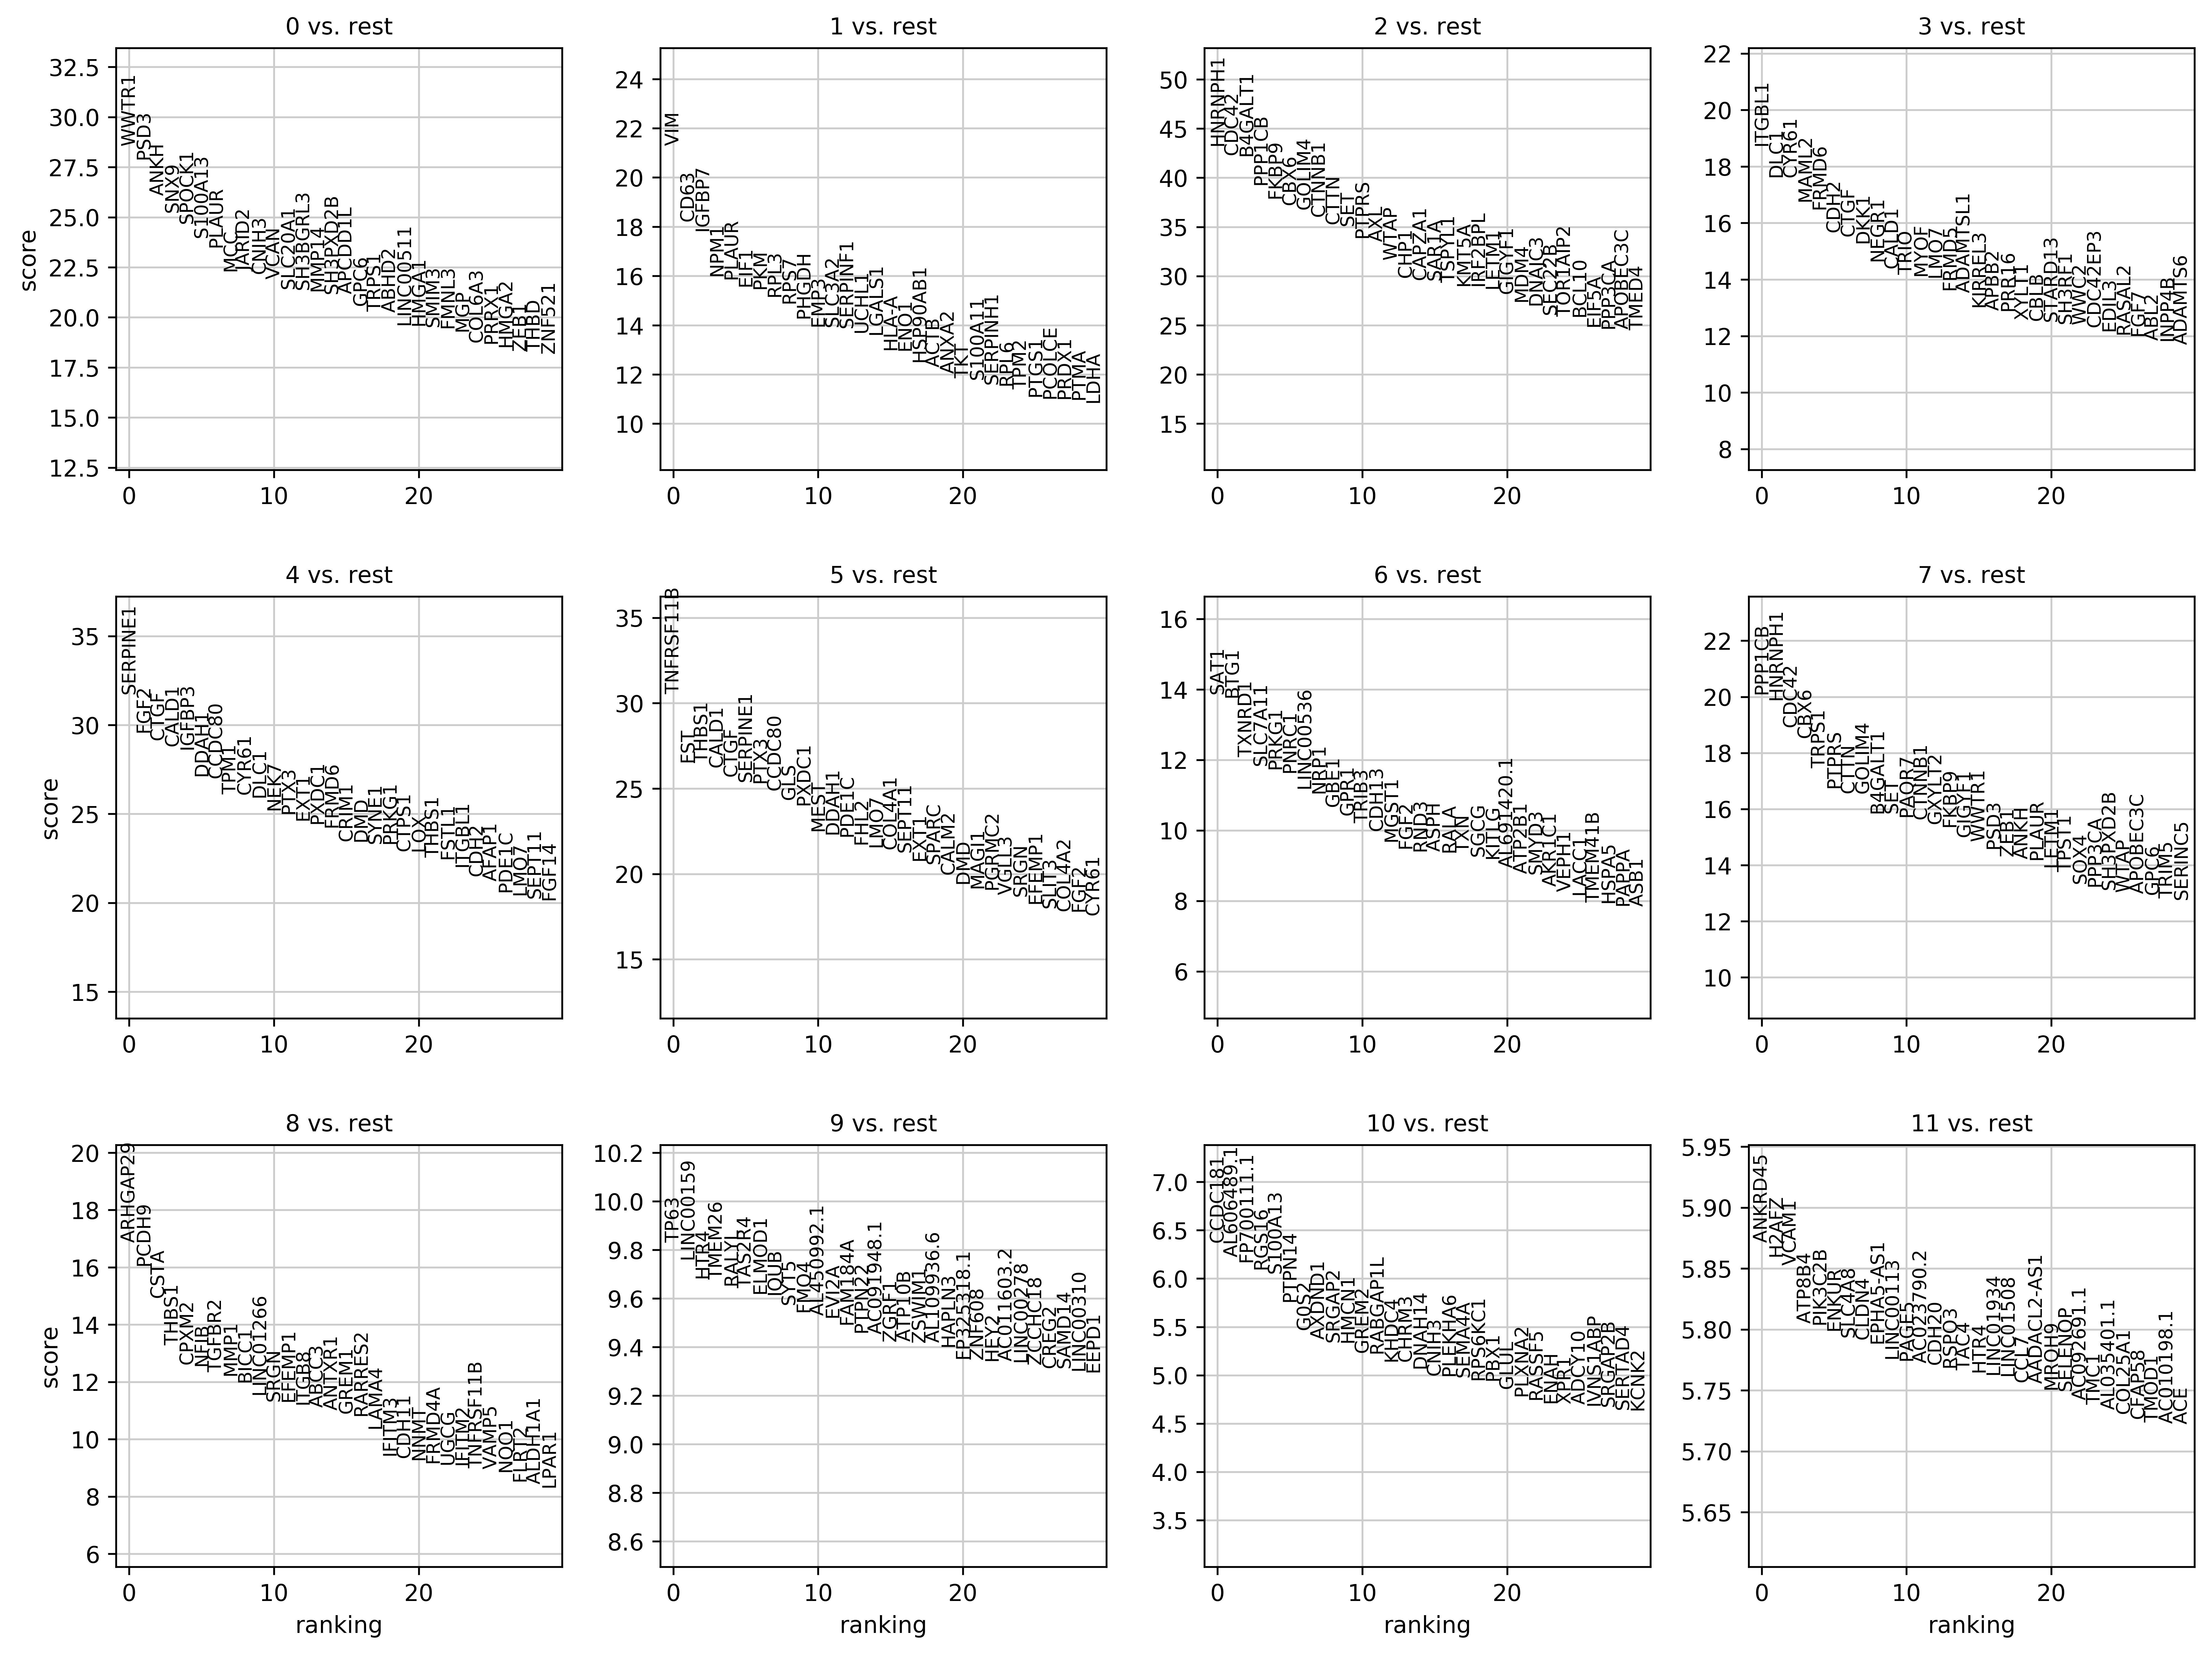

In [4]:
for batch, matrix in batches.items():
    print("marker genes per cluster for batch", batch)

    sc.set_figure_params(scanpy=True, dpi=300, dpi_save=300, frameon=True, vector_friendly=True, fontsize=10, color_map=None, format='pdf', transparent=False, ipython_format='png2x')
    sc.tl.rank_genes_groups(matrix, 'louvain', method='wilcoxon', corr_method="benjamini-hochberg", n_genes=100)
    sc.pl.rank_genes_groups(matrix, n_genes=30, sharey=False)

## Some analysis I don't have the time to understand

TODO: go through this w/ Adam/Ange

In [5]:
def magic_analysis(matrix, cluster_no, n):
    pvals_adj = np.array(matrix.uns['rank_genes_groups']['logfoldchanges'].tolist()).T[cluster_no][:n].tolist()
    #pvals_adj = np.array(adata.uns['rank_genes_groups']['pvals_adj'].tolist()).T[cluster_no][:n].tolist()
    names = np.array(matrix.uns['rank_genes_groups']['names'].tolist()).T[cluster_no][:n].tolist()
    genes = list(zip(names, pvals_adj))
    
    print("something with genes and logged p-values in cluster")
    
    for i, j in genes:
        print(i)
    
    print("now sorting genes by pvalue")
    genes.sort(key=lambda i: i[1], reverse=True)

    print("get those with pvalue > 1")
    for i, j in genes:
        if j > 1:
            print(i, j)
            
    print("get those with pvalue < -1")
    for i, j in genes:
        if j < -1:
            print(i, j)


In [6]:
magic_analysis(batches["treated"], 4, 100)

something with genes and logged p-values in cluster
SERPINE1
FGF2
CTGF
CALD1
IGFBP3
DDAH1
CCDC80
TPM1
CYR61
DLC1
NEK7
PTX3
EXT1
PXDC1
FRMD6
CRIM1
DMD
SYNE1
PRKG1
CTPS1
LOX
THBS1
FSTL1
ITGBL1
CDH2
AFAP1
PDE1C
LMO7
SEPT11
FGF14
FHL2
TIMP3
KCNK2
RAB32
GLS
GPR1
SEC61G
ATP2B1
MSRB3
NUDT6
MYL9
FST
GAS6
KCNMA1
TXNRD1
NEXN
SH3RF1
CALM2
STC2
PPP1R15A
MIR22HG
GADD45A
PHLDB2
CNN3
UGCG
SMURF2
AC092807.3
MYL6
SSR3
XYLT1
SGCG
STARD13
CDC42EP3
CYTOR
RBMS3
NEGR1
HERPUD1
TRIB3
HSPA5
COL12A1
AMIGO2
HIF1A
MSMO1
FMN1
RAPH1
AL357507.1
ACVR2A
LIMA1
CDH13
NNMT
BDNF
GFPT1
ITGA11
RND3
DKK1
ENC1
MIR4435-2HG
CFHR1
CYCS
KIRREL3
JADE1
ADAMTS1
EPG5
SPCS3
MARCKS
ASB1
DNAJB9
PGRMC2
RUSC2
MFAP5
now sorting genes by pvalue
get those with pvalue > 1
PHLDB2 2.868828773498535
SSR3 2.868828773498535
FRMD6 2.8688271045684814
ATP2B1 2.8688268661499023
DNAJB9 2.8688266277313232
AL357507.1 2.868826389312744
LIMA1 2.868826150894165
FGF14 2.868825912475586
GADD45A 2.868825912475586
SMURF2 2.868825912475586
AMIGO2 2.8688259124755

In [7]:
magic_analysis(batches["treated"], 5, 100)

something with genes and logged p-values in cluster
TNFRSF11B
FST
THBS1
CALD1
CTGF
SERPINE1
PTX3
CCDC80
GLS
PXDC1
MEST
DDAH1
PDE1C
FHL2
LMO7
COL4A1
SEPT11
EXT1
SPARC
CALM2
DMD
MAGI1
PGRMC2
VGLL3
SRGN
EFEMP1
SLIT3
COL4A2
FGF2
CYR61
FSTL1
STC2
ITGBL1
CRIM1
GADD45A
IGFBP4
TPM1
JADE1
PAWR
CDKN2B
RAPH1
LOX
HIF1A
RBMS3
STARD13
AFAP1
DLC1
LIMA1
MPRIP
ALPK2
FLRT2
COL5A1
SYNE1
STAT1
CPEB4
NUAK1
F3
PCDH9
FAM43A
OSBPL8
SEC61G
PLOD2
LOXL2
ITGA11
NEK10
SFRP4
NEK7
CCL2
TXNRD1
CTIF
UBASH3B
THY1
FGF14
COL1A1
GRIA4
MYL9
C1orf198
THBS2
S100A3
GPR1
FN1
MYH10
UACA
SERPINE2
CTHRC1
MAGIX
C9orf3
HYOU1
CSRP1
MSRB3
LIMCH1
ERVMER61-1
MSMO1
LINC00513
LINC00662
PHACTR2
ZNF34
PKP4
GPR176
AL022238.2
now sorting genes by pvalue
get those with pvalue > 1
ERVMER61-1 2.939711809158325
AL022238.2 2.9397079944610596
MAGIX 2.9397048950195312
GRIA4 2.939703941345215
GPR1 2.9397013187408447
COL4A2 2.9397003650665283
TXNRD1 2.939700126647949
CTGF 2.939699172973633
SYNE1 2.939699172973633
THBS2 2.939699172973633
LINC00513 2.9

In [8]:
magic_analysis(batches["treated"], 0, 100)

something with genes and logged p-values in cluster
WWTR1
PSD3
ANKH
SNX9
SPOCK1
S100A13
PLAUR
MCC
JARID2
CNIH3
VCAN
SLC20A1
SH3BGRL3
MMP14
SH3PXD2B
APCDD1L
GPC6
TRPS1
ABHD2
LINC00511
HMGA1
SMIM3
FMNL3
MGP
COL6A3
PRRX1
HMGA2
ZEB1
THBD
ZNF521
ARHGAP22
LMNA
HDAC8
PMEPA1
PTK2
NEAT1
PLXNA4
GRIA3
LTBP1
SYT1
ISLR
SLC44A1
LINC01943
EMP3
RUNX1
SYNJ2
SOCS5
JUNB
KCNN4
CHD9
ARL4C
MAP4K4
S100A16
FAP
TPST1
FAM168A
TGFB1
TNS3
MXRA8
ZMIZ1
PPFIBP1
PDGFRB
GSN
CASC15
VIM
FUT8
NUMB
ARHGAP32
PKM
SERPINF1
COL8A1
BNC2
MAST4
SOX5
ITGA2
PBX1
PRSS3
DLEU2
HMCN1
CRLF1
SLC14A1
LHFPL2
PTMA
ANKRD44
ST3GAL4
SMC4
SGCD
CYTL1
CDK14
RAB31
CCDC85B
ADAM12
GPX4
GPAT3
PITPNC1
SEPT9
MTSS1
SMIM14
PDS5B
SOX6
now sorting genes by pvalue
get those with pvalue > 1
ZNF521 2.241311550140381
NUMB 2.241311550140381
S100A13 2.2413113117218018
MMP14 2.2413108348846436
CNIH3 2.2413103580474854
SEPT9 2.2413103580474854
HMGA1 2.2413101196289062
CYTL1 2.241309881210327
SMIM14 2.241309881210327
TNS3 2.241309642791748
LHFPL2 2.241309642791748

In [9]:
magic_analysis(batches["treated"], 3, 100)

something with genes and logged p-values in cluster
ITGBL1
DLC1
CYR61
MAML2
FRMD6
CDH2
CTGF
DKK1
NEGR1
CALD1
TRIO
MYOF
LMO7
FRMD5
ADAMTSL1
KIRREL3
APBB2
PRR16
XYLT1
CBLB
STARD13
SH3RF1
WWC2
CDC42EP3
EDIL3
RASAL2
FGF7
ABL2
INPP4B
ADAMTS6
SEMA3C
PDGFC
DPYD
CYTOR
ARID5B
NTM
TEAD1
AFAP1
CDK14
MIR4435-2HG
CDH11
SIPA1L1
MYO1B
PDLIM5
SPOCK1
MKL1
UAP1
ABL1
LATS2
CEBPD
NAV3
PLXDC2
AMOTL2
FGF14
CDK6
TGFBR2
INHBA
ACVR2A
FILIP1L
COL8A1
SMURF2
CLTCL1
MSRB3
ARHGAP29
ASAP1
COL12A1
CNST
EXT1
PEAK1
MIR222HG
PRRX1
CEP170
SYNE1
SAMD4A
SLIT2
TCF4
CXCL12
CRIM1
EPS8
ADAMTS12
EPHA3
NEXN
NALCN
ARHGAP10
ITGA11
SLC19A2
PTPN13
LIMA1
MAGI1
GALNT10
MT-CO3
UNC5B
ELL2
PTPN14
GPR176
AC016831.1
BICD1
TLE4
CITED2
SH3BP4
now sorting genes by pvalue
get those with pvalue > 1
CALD1 2.8688275814056396
PRR16 2.8688275814056396
CXCL12 2.8688275814056396
ARHGAP10 2.8688273429870605
CITED2 2.8688273429870605
ARHGAP29 2.8688268661499023
CTGF 2.8688266277313232
WWC2 2.8688266277313232
MSRB3 2.8688266277313232
SYNE1 2.86882638931